# Laboratorio 4.1 - Descenso de gradiente estocástico y aplicaciones

MA4402 - Simulación Estocástica: Teoría y Laboratorio

Profesor: Joaquín Fontobona T.

Auxiliares: Pablo Zúñiga Rodríguez-Peña, Arie Wortsman Z., Camilo Carvajal Reyes

**Grupo N**

**Integrantes:**

- Integrante 1
- Integrante 2
- Integrante 3

## Problema 1 - Regresión Lineal

Dado un conjunto de datos $(x_i,y_i)_{i=1}^n\subset\mathbb{R}^m\times\mathbb{R}$, se propone la siguiente relación entre sus componentes
$$  y = \theta^Tx + \varepsilon\,,$$
en donde $\varepsilon$ es una variable aleatoria con valor esperado 0 y distribución desconocida. El problema de regresión lineal consiste en encontrar el parámetro $\theta$ tal que el conjunto de datos satisfaga la ecuación anterior, de manera tal que $\mathrm{Var}(\varepsilon)$ sea lo más pequeña posible. Esto conlleva al problema de optimización
$$ \hat{\theta} = \arg\,\min_{\theta} \mathrm{Var}(\varepsilon) = \arg\,\min_{\theta}\mathbb{E}\left((y-\theta^Tx)^2\right)\,.$$

El objetivo de esta pregunta es aplicar el modelo anterior sobre el conjunto de datos **Diabetes** y estimar el mejor parámetro posible utilizando el método de descenso de gradiente estocástico. 

> 1.a - Cargue el conjunto de datos utilizando el siguiente código. Observe la cantidad de variables y el tipo de datos que posee. ¿Que complicaciones pueden surgir de usar un modelo predictivo en un contexto real? Reflexione acerca de la naturaleza del dataset y la tarea que se quiere ejecutar.

In [ ]:
from sklearn.datasets import load_diabetes

df, target = load_diabetes(return_X_y=True,as_frame=True)
print(load_diabetes().DESCR)
print("Target variable statistcs:\n"+str(target.describe()))
df.head()

Nos referimos a estandarizar cuando forzamos los datos a tener una distribución normal estándar. Para esto, reemplazamos cada punto de dato $x_i$ por:

$$ \tilde x_i = \frac{x_i-\mu}{\sigma}$$

En donde $\mu$ es la media de la columna y $\sigma$ es su desviación estándar.

> 1.b - Estandarice los datos (sin usar funciones de pre-procesamiento) para que el modelo a trabajar funcione. Extienda la base de datos (agregando una columna) para obtener un modelo de regresión lineal, esta vez representado por una función afín de la forma $y_i = \theta^Tx_i + b + \varepsilon_i$, con $\theta\in \mathbb{R}^m,\,b\in \mathbb{R}$.

Nota: no estandarice la columna objetivo.

> 1.c - Separe los datos en un conjunto de entrenamiento y otro de prueba según la proporción 80\% y 20\%,  Justifique brevemente por qué esto es necesario. Le será útil la función siguiente.

In [ ]:
from sklearn.model_selection import train_test_split

En lo que sigue justifique sus respuestas graficando la función de costos cada cierta cantidad de iteraciones. Cuando se pida comparar diferentes implementaciones debe realizarlo en base al conjunto de datos de prueba y el error cuadrático medio incurrido con la estimación obtenida. Tanto la cantidad de iteraciones como los parámetros pueden ser escogidos libremente.

> 2 - Implemente el algoritmo de descenso de gradiente estocástico para un modelo de regresión lineal, especificando cuál es la función de costos y su gradiente. Considere los siguientes casos
-  _Learning rates_ constantes.
-  _Learning rates_ variables (proponga al menos 2).

> Proponga al menos dos en cada caso. Compare los resultados obtenidos para cada elección ¿Cuál es la mejor elección?

**Respuesta**

> 3 - Modifique el algoritmo anterior para trabajar con _mini-batch_. Pruebe el desempeño (nuevamente en términos del error cuadrático medio para el conjunto de prueba) del algoritmo para distintos tamaños de _mini-batch_ y _learning rates_ y justifique cual es el mejor ¿Existe alguna relación entre ambos parámetros?

> 4 - Implemente las siguientes variantes de descenso de gradiente estocástico y compare el desempeño de estos con los algoritmos implementados en las partes anteriores
- **Momentum:** El método consiste en ir generando los pasos de descenso como

$$ m_{i} = \beta m_{i-1} + (1-\beta)\nabla_{\theta}f(\theta_i,x_{i}),\, m_0 = 0\,, $$

tal que

$$\theta_{i+1} = \theta_i -\eta\, m_i\,,$$

donde $\beta\in(0,1)$ (debe ser elegido).

- **Adagrad:** El _learning rate_ es variable y se genera de la siguiente manera:

$$\eta_{i} = \frac{\eta}{\sqrt{v_{i} + c}}, $$

donde $c>0$, $\eta>0$ y 

$$ v_{i} ={} \sum_{j = 1}^{i}\|\nabla_{\theta}f(\theta_j,x_j)\|^2 \text{ , }\, v_0 = 0\,.$$

> 5 (bonus) - Realice una búsqueda de grilla (_gridsearch_) para escoger los mejores hiperparámetros para Momentum y Adagrad. Dado un batch size $m$, reporte los errores del test set en un mapa de calor para valores de $\beta$ y $\nu$ (respectivamente $c$ y $\nu$) de su elección. Repita para otro valor de $m$. Describa los resultados y concluya.

## Pregunta 2 - Redes Neuronales

El objetivo de este problema es explorar el uso de una biblioteca de aprendizaje profundo. Más precisamente, implementaremos modelos de redes neuronales para clasificar imágenes usando la biblioteca _PyTorch_. 

Para esto usaremos la base de datos _MNIST_, que consiste en dígitos escritos a mano. La tarea consiste en entrenar un modelo que identifique de manera automática el dígito en cuestión. Para importar el conjunto, se debe descargar el archivo `mnist.pkl.gz` y ejecutar el siguiente código.

In [1]:
import pickle
import gzip

with gzip.open('data/mnist.pkl.gz', "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


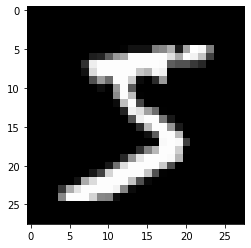

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

Un **Tensor** en el contexto de aprendizaje de máquinas, corresponde a la generalización de una matriz a dimensiones más altas, similar al concepto de arreglo de bibliotecas como _numpy_. _PyTorch_ utiliza tensores para las computaciones, con la característica especial de que poder operarlos de manera rápida usando GPUs.

In [3]:
import torch

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
n, d = x_train.shape;

El primer objetivo será definir un modelo que conste de una sola capa lineal, lo cual equivale a una regresión logística si le aplicamos la función _softmax_. Definimos los parámetros de nuestra regresión como tensores, los cuales serán después optimizados. A modo de ejemplo, mostramos el resultado de darle un "mini-batch" a los parámetros de nuestro modelo no entrenado.

In [4]:
import math

pesos = torch.randn(784, 10) / math.sqrt(784)
pesos.requires_grad_()
sesgo = torch.zeros(10, requires_grad=True)

In [5]:
batch_size = 64
x_batch = x_train[0:batch_size]
preds = x_batch @ pesos + sesgo
print(preds.shape)
print(preds[0])

torch.Size([64, 10])
tensor([-0.2377, -0.0996, -0.1152, -0.5616,  0.0341,  0.2325,  0.3503,  0.5375,
        -0.3854, -0.6338], grad_fn=<SelectBackward0>)


Notemos que en el output contiene una función de gradiente. Esto puesto a que _PyTorch_ guarda la información de los pasos aplicados a tensores. Esto se usa posteriormente para computar los gradientes para cada parámetro, los cuales se usarán en Descenso de Gradiente. Este método se llama Diferenciación Automática.

Ahora necesitamos definir una función de pérdida a minimizar. Esta sección se concentrará en justificar el uso de la función de pérdida entropía cruzada.

Nos gustaría ajustar los parámetros de tal forma que la distribución de probabilidad dada por la red se asemeje lo más posible a la real distribución de los datos. Como solo tenemos observaciones de estos datos, para lo anterior buscaremos el estimador de máxima verosimilitud. Por ende queremos maximizar

$$ \prod^N_{i=1}p_\theta(y^{(i)}|x^{(i)})$$

donde $y^{(i)}\in\{c_1,\dots,c_k\}$ (las clases posibles) y $\theta$ son los parámetros de la red, que a su vez computa $p_\theta(c_j|x)$ en un paso _forward_ dado un punto de dato $x$. En otras palabras

$$ \hat\theta = \arg \max_\theta \prod^N_{i=1}p_\theta(y^{(i)}|x^{(i)}) $$

1.a - Justifique que

$$ \hat\theta = \arg \max_\theta \frac{1}{N} \sum^N_{i=1} log(P_\theta(y^{(i)}|x^{(i)})) $$

Sean $p$ y $q$ dos distribuciones de probabilidad discreta. La **entropía cruzada** está dada por 

$$ H(p,q) = \sum_x p(x) log(\frac{1}{q(x)})) \,.$$

Se define entonces la función de pérdida de entropía cruzada por

$$ L(q,p) = \frac{1}{N}\sum^N_{i=1}H(p_i,q_i) $$

1.b - Demuestre que

$$ \hat\theta = \arg \min_\theta L(p_\theta,p)$$

donde $p$ es la distribución de probabilidad empírica.

1.c - Comente brevemente la relación entre la entropía cruzada y la teoría de la información.

**Respuesta**

La función de pérdida de entropía cruzada puede ser accedida en _PyTorch_ mediante:

In [6]:
import torch.nn.functional as F

func_costo = F.cross_entropy
print(func_costo(x_valid @ pesos + sesgo,y_valid).item())

2.3304712772369385


2.a - Complete el siguiente código que implementa **Descenso de Gradiente Mini-batch** para ajustar los parámetros del modelo dada una tasa de aprendizaje.

In [8]:
def DescensoGradiente(pesos,sesgo,tasa):
    perdidas_epoch = []
    # rellenar acá
    cantidad_batches = None  # cambiar
    # ------------
    for i in range(cantidad_batches):
        # rellenar acá
        loss = None  # calcular pérdida
        # ------------
        loss.backward()
        with torch.no_grad():
            pesos -= pesos.grad * tasa
            sesgo -= sesgo.grad * tasa
            pesos.grad.zero_()
            sesgo.grad.zero_()
        perdidas_epoch.append(loss.item())
    return perdidas_epoch

A una barrida completa al conjunto de entrenamiento se le llama época (o _epoch_ en inglés).

2.b - Implemente una función `entrenar` que tome un número de épocas y ejecute el método anterior en cada iteración, imprimiendo el valor de la función de pérdida. Guarde además estas pérdidas en una lista,

2c - Ejecute el bucle para K épocas y grafique. Utilice otras métricas para evaluar la calidad de la clasificación, ¿que clases son más y menos fáciles de reconocer con el algoritmo? Le puede ser útil el [reporte de clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) de scikit-learn y la siguiente función para obtener las predicciones:

In [ ]:
logsoftmax = torch.nn.LogSoftmax(dim=0)

def predicciones(output):
    return torch.argmax(logsoftmax(output),axis=1)

La biblioteca _PyTorch_ nos provee de variadas herramientas que pueden ser útiles para el entrenamiento. Una de ellas es el módulo [torch.distributions](https://pytorch.org/docs/stable/distributions.html). Esta nos provee de algunas variables aleatorias conocidas de las cuales podemos samplear. Por ejemplo, para samplear de una distribución Gaussiana de dimensión 10, centrada en cero y con diagonal $=I$ ejecutamos:

In [14]:
from torch.distributions import MultivariateNormal

normal = MultivariateNormal(torch.zeros(2), torch.eye(2))
normal.sample()

tensor([ 2.0379, -0.1660])

3 - Usando esto, implemente la variante **Langevin Dynamics** del algoritmo de Gradiente Estocástico. Re-defina los parámetros del modelo y ajústelos usando esta variante. Grafique y comente. ¿Que desventajas puede tener usar este método para optimizar otros modelos?

Observación: le puede ser útil el método `.reshape()`, que funciona para tensores del mismo modo que para arreglos de numpy.

A continuación se implementaremos lo anterior pero con el procedimiento usual que se usa en _PyTorch_. Necesitamos definir nuestro modelo como una clase, que heredará atributos de la clase _torch.nn.Module_. En _torch.nn_ podemos encontrar numerosos "bloques" para armar modelos. En este caso, simplemente usamos una capa lineal.

Una parte esencial de nuestro modelo es el paso `forward`, que será aquel que se ejecute cuando llamemos a nuestro modelo en uno o varios puntos de datos.

Para más detalles ver [la documentación](https://pytorch.org/docs/stable/nn.html).

In [31]:
from torch import nn

class Reg_Logistica(nn.Module):
    def __init__(self):
        super().__init__()
        self.lineal = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lineal(xb)

Además, usamos el módulo [torch.optim](https://pytorch.org/docs/stable/optim.html) para entrenar las redes, lo cual hace más consciso el código de gradiente estocástico escrito anteriormente.

In [32]:
from torch import optim

modelo = Reg_Logistica()
opt_SGD = optim.SGD(modelo.parameters(), lr=learning_rate)

Una vez importado nuestro optimizador, no es necesario actualizar uno por uno nuestros parámetros, lo cual es particularmente útil cuando tenemos muchos (por ejemplo, en aprendizaje profundo).

Reemplazamos

In [ ]:
with torch.no_grad():
    pesos -= pesos.grad * learning_rate
    sesgo -= sesgo.grad * learning_rate
    pesos.grad.zero_()
    sesgo.grad.zero_()

con

In [ ]:
opt_SGD.step()
opt_SGD.zero_grad()

4.a - En base a lo anterior, re-defina el método entrenar para que tome un optimizador del módulo `optim`, un modelo (sin entrenar) y un número de epocas. Ejecute el método con Descenso de Gradiente y grafique. Escoja dos métodos más del módulo `optim`, entrene modelos con ellos y compare.

4.b - Re-defina el modelo usando una capa intermedia. Entrenelo usando alguna de los optimizadores. ¿Cómo se comparan los resultados de esta nueva red en ambos conjuntos con los modelos anteriores? Justifique.

5 (bonus) - Un tipo de red neuronal que funciona bien para el procesamiento de imágenes son las **redes convolucionales (_CNN_)**. Averigue a que corresponde un **Núcleo (_Kernel_)** en procesamiento digital de imágenes y resuma en un parrafo. Investigue y mencione alguna ventaja de usar redes convolucionales. 

A continuación complete el siguiente código usando [redes convolucionales](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) (en vez de capas lineales) y [ReLu](https://pytorch.org/docs/stable/generated/torch.nn.functional.relu.html) como no linealidad. Pruebe su red del mismo modo que antes y compare los resultados con las partes anteriores.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # defina acá dos o más transformaciones convolucionales
        # considere kernel_size=3, stride=2, padding=1
        # como mnist está en blanco y negro el número de canales del input es 1

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        # transforme xb componiendo las capas convolucionales con relu
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))